<h3>
Here is an overview of the columns in the dataset
</h3>

carat - Carat weight of the diamond <br>
cut - Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal<br>
color - Color of the diamond, with D being the best and J the worst<br>
clarity - How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3<br>
depthdepth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter<br>
tabletable%: The width of the diamond's table expressed as a percentage of its average diameter<br>
price - the price of the diamond<br>
x - length mm<br>
y -width mm<br>
z - depth mm<br>


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

In [2]:
file_path = "C:\\Users\\Anagha\\ADA\\Projects\\Diamonds\\Diamonds.xlsx"
df=pd.read_excel(file_path)

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df = df.drop(['Unnamed: 0'], axis = 1) 
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


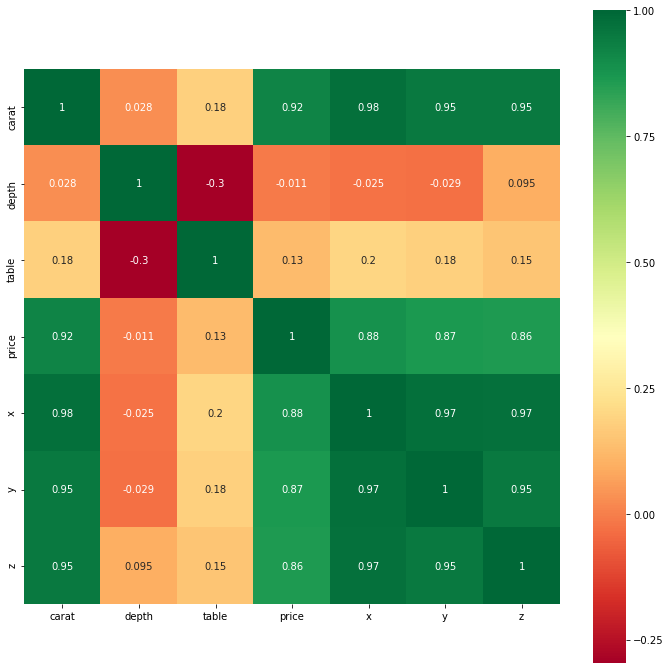

In [5]:
plt.figure(figsize=(12,12)) 
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)

We can see that x, y, z and carat have a strong relation with price. But table and depth does not.

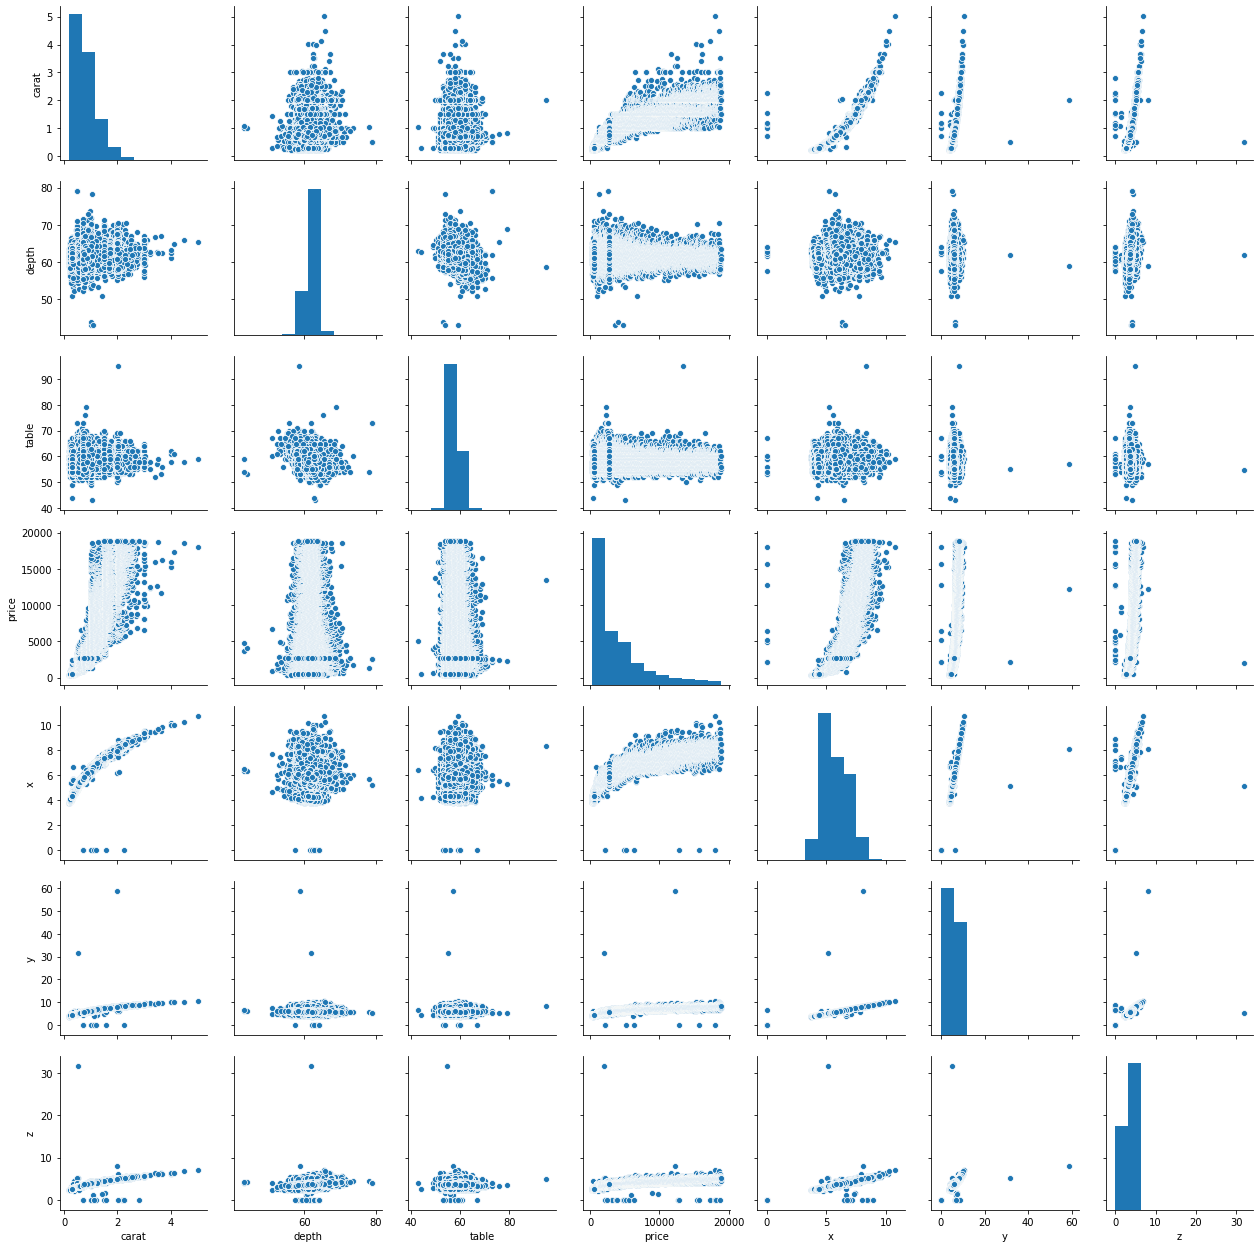

In [6]:
p=sns.pairplot(df)

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We can see that minimum x, y and z values are 0. This is not possible as they are dimensions to the diamond. Hence we will drop them.

In [8]:
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [9]:
df.dropna(inplace=True)
df.shape

(53920, 10)

Looking into all continuous factors

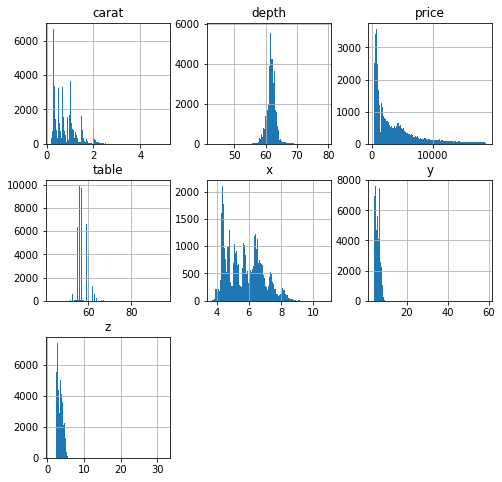

In [10]:
p = df.hist(figsize = (8,8),bins=150)

Now looking into categorical factors

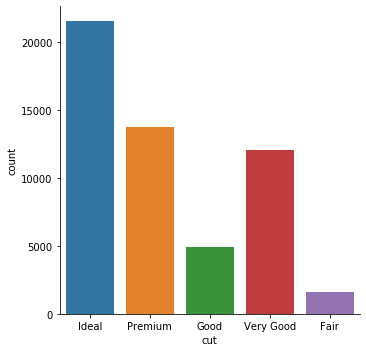

In [11]:
p = sns.catplot(x='cut', data=df , kind='count',aspect=1 )

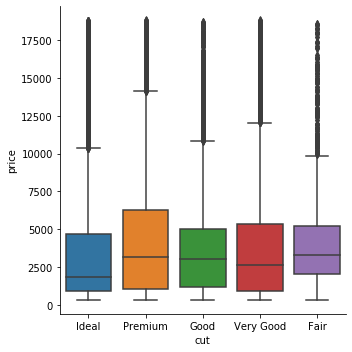

In [15]:
p = sns.catplot(x='cut', y='price', data=df, kind='box' ,aspect=1 )

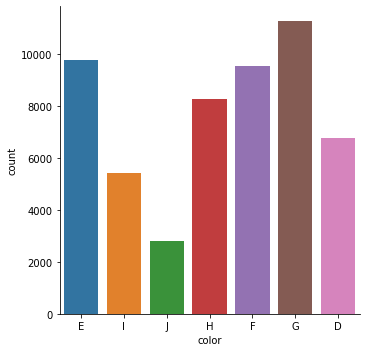

In [18]:
p = sns.catplot(x='color', data=df , kind='count',aspect=1 )

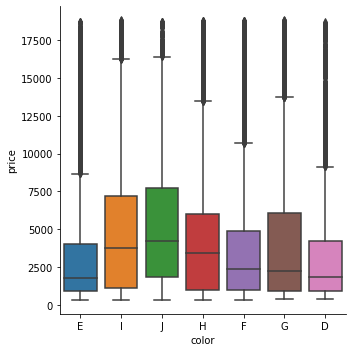

In [19]:
p = sns.catplot(x='color', y='price', data=df, kind='box' ,aspect=1 )

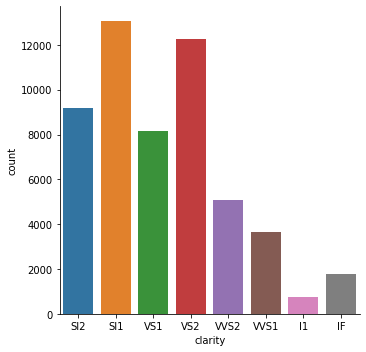

In [21]:
p = sns.catplot(x='clarity', data=df , kind='count',aspect=1 )

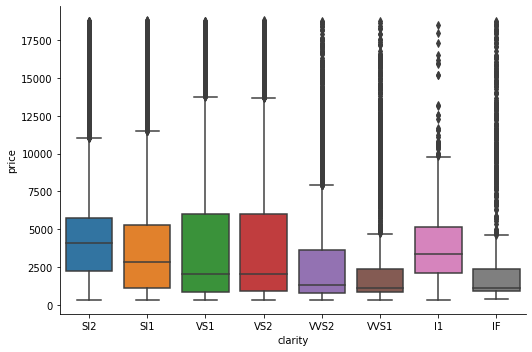

In [23]:
p = sns.catplot(x='clarity', y='price', data=df, kind='box' ,aspect=1.5 )

I am using One-Hot encoding system to convert the categorical variables into continuous variables.

In [24]:
one_hot_encoder =  pd.get_dummies(df)
one_hot_encoder.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


Scaling the data to normalize it

In [37]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(one_hot_encoder[['carat','depth','x','y','z','table','price']]),columns=['carat','depth','x','y','z','table','price'],index=one_hot_encoder.index)

In [38]:
numericals.head()

,carat,depth,x,y,z,table,price
0,-1.198204,-0.174203,-1.591573,-1.539219,-1.580084,-1.099725,-0.904132
1,-1.240417,-1.361090,-1.645173,-1.662014,-1.750896,1.585988,-0.904132
2,-1.198204,-3.385781,-1.502241,-1.460280,-1.750896,3.376463,-0.903881
3,-1.071566,0.454149,-1.368242,-1.319943,-1.295396,0.243131,-0.902125
4,-1.029353,1.082501,-1.243176,-1.214690,-1.124583,0.243131,-0.901875


Comparing the before and after data

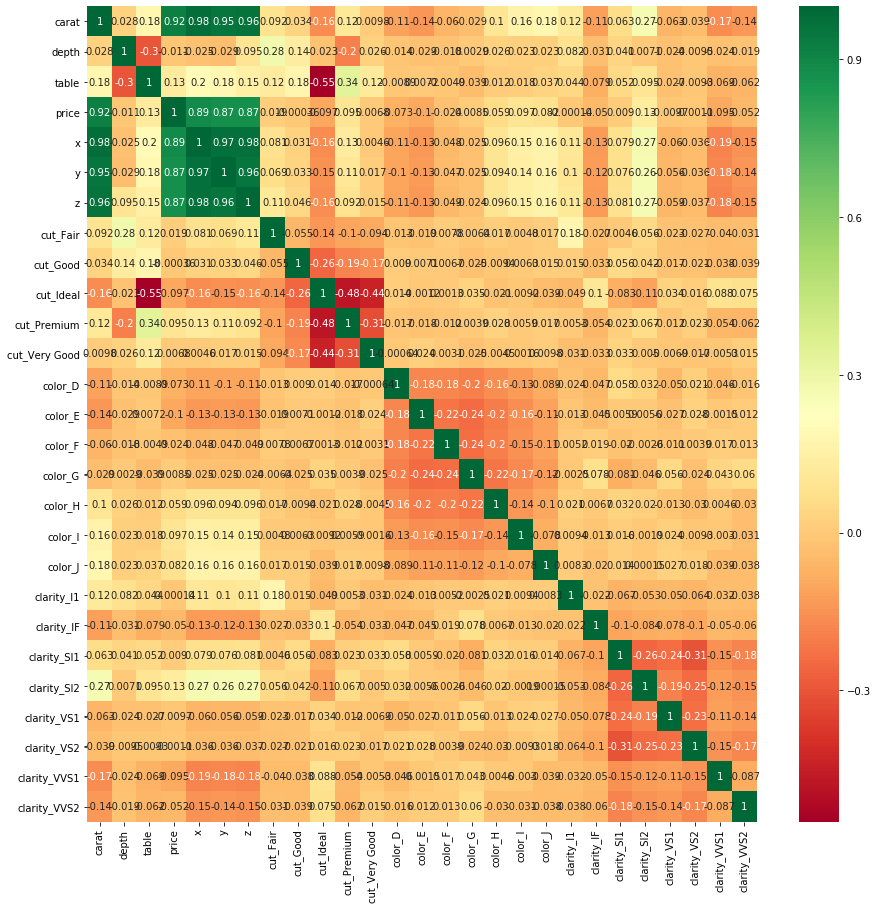

In [39]:
plt.figure(figsize=(15,15))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(one_hot_encoder.corr(), annot=True,cmap='RdYlGn')  # seaborn has very simple solution for heatmap

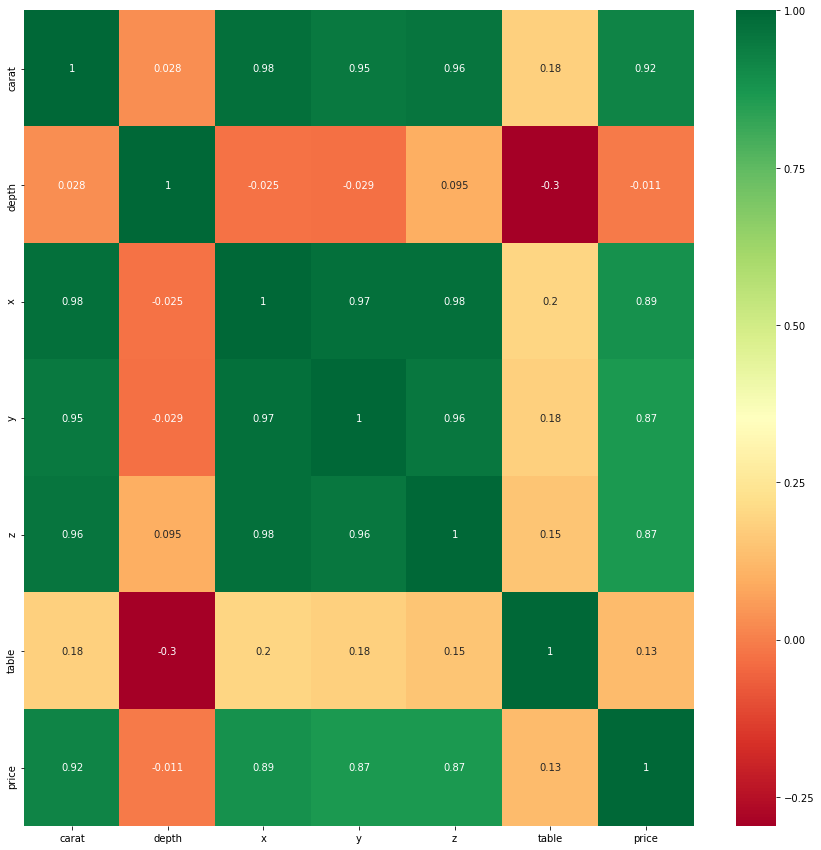

In [40]:
plt.figure(figsize=(15,15))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(numericals.corr(), annot=True,cmap='RdYlGn')  # seaborn has very simple solution for heatmap

In [42]:
x = numericals.drop(["price"],axis=1)
y = numericals.price
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("Accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Accuracy: 86.03673251551885%
Mean absolute error: 0.22220084032933762
Mean squared error: 0.1378131245732115
R Squared: 0.8603673251551884
Adjusted R Squared: 0.8603241486941975
